# Task 1

In [20]:
import random
import time


class Node:
    def __init__(self, key, value):
        self.data = (key, value)
        self.next = None
        self.prev = None


class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def push(self, key, value):
        new_node = Node(key, value)
        new_node.next = self.head
        if self.head:
            self.head.prev = new_node
        else:
            self.tail = new_node
        self.head = new_node
        return new_node

    def remove(self, node):
        if node.prev:
            node.prev.next = node.next
        else:
            self.head = node.next
        if node.next:
            node.next.prev = node.prev
        else:
            self.tail = node.prev
        node.prev = None
        node.next = None

    def move_to_front(self, node):
        if node != self.head:
            self.remove(node)
            node.next = self.head
            self.head.prev = node
            self.head = node

    def remove_last(self):
        if self.tail:
            last = self.tail
            self.remove(last)
            return last
        return None


class LRUCache:
    def __init__(self, capacity):
        self.capacity = capacity
        self.cache = {}
        self.list = DoublyLinkedList()

    def get(self, key):
        if key in self.cache:
            node = self.cache[key]
            self.list.move_to_front(node)
            return node.data[1]
        return -1

    def put(self, key, value):
        if key in self.cache:
            node = self.cache[key]
            node.data = (key, value)
            self.list.move_to_front(node)
        else:
            if len(self.cache) >= self.capacity:
                last = self.list.remove_last()
                if last:
                    del self.cache[last.data[0]]
            new_node = self.list.push(key, value)
            self.cache[key] = new_node

    def remove(self, idx):
        keys = [key for key in self.cache.keys() if key[0] <= idx <= key[1]]
        for key in keys:
            self.list.remove(self.cache[key])
            del self.cache[key]


cache = LRUCache(1000)

def range_sum_no_cache(arr, l, r):
    return sum(arr[l:r+1])

def update_no_cache(arr, idx, val):
    arr[idx] = val

def range_sum_with_cache(arr, l, r):
    cached = cache.get((l, r))
    if cached >= 0:
        return cached
    result = sum(arr[l:r+1])
    cache.put((l, r), result)
    return result

def update_with_cache(arr, idx, val):
    arr[idx] = val
    cache.remove(idx)

max_value = 1_000_000_000

# Генерація масиву розміром 100_000 елементів
N = 100_000
array = [random.randint(1, max_value) for _ in range(N)]

no_cache_arr = array.copy()
cache_arr = array.copy()

# Генерація запитів
Q = 50_000
queries = []
for _ in range(Q):
    if random.choice(['Range', 'Update']) == 'Range':
        L = random.randint(0, N-1)
        R = random.randint(L, N-1)
        queries.append(('Range', L, R))
    else:
        index = random.randint(0, N-1)
        value = random.randint(1, max_value)
        queries.append(('Update', index, value))

# Виконання запитів без кешу

start_time = time.time()
for query in queries:
    if query[0] == 'Range':
        range_sum_no_cache(no_cache_arr, query[1], query[2])
    else:
        update_no_cache(no_cache_arr, query[1], query[2])
no_cache_time = time.time() - start_time

# Виконання запитів з кешем
start_time = time.time()
for query in queries:
    if query[0] == 'Range':
        range_sum_with_cache(cache_arr, query[1], query[2])
    else:
        update_with_cache(cache_arr, query[1], query[2])
cache_time = time.time() - start_time

print(f"Time without cache: {no_cache_time:.2f} seconds")
print(f"Time with cache: {cache_time:.2f} seconds")

Time without cache: 5.27 seconds
Time with cache: 4.74 seconds


# Task 2

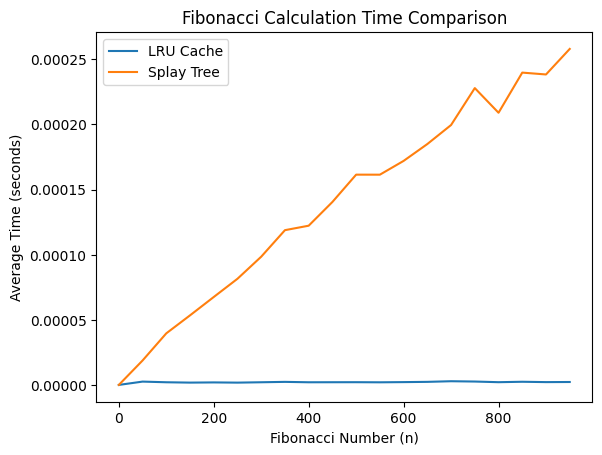

In [22]:
from functools import lru_cache
import timeit
import matplotlib.pyplot as plt


@lru_cache(maxsize=None)
def fibonacci_lru(n):
    if n < 2:
        return n
    return fibonacci_lru(n-1) + fibonacci_lru(n-2)

class SplayTreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None

class SplayTree:
    def __init__(self):
        self.root = None

    def _splay(self, root, key):
        if root is None or root.key == key:
            return root

        if root.key > key:
            if root.left is None:
                return root
            if root.left.key > key:
                root.left.left = self._splay(root.left.left, key)
                root = self._rotate_right(root)
            elif root.left.key < key:
                root.left.right = self._splay(root.left.right, key)
                if root.left.right is not None:
                    root.left = self._rotate_left(root.left)
            return self._rotate_right(root) if root.left is not None else root
        else:
            if root.right is None:
                return root
            if root.right.key > key:
                root.right.left = self._splay(root.right.left, key)
                if root.right.left is not None:
                    root.right = self._rotate_right(root.right)
            elif root.right.key < key:
                root.right.right = self._splay(root.right.right, key)
                root = self._rotate_left(root)
            return self._rotate_left(root) if root.right is not None else root

    def _rotate_right(self, x):
        y = x.left
        x.left = y.right
        y.right = x
        return y

    def _rotate_left(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        return y

    def insert(self, key, value):
        if self.root is None:
            self.root = SplayTreeNode(key, value)
            return
        self.root = self._splay(self.root, key)
        if self.root.key == key:
            self.root.value = value
            return
        new_node = SplayTreeNode(key, value)
        if self.root.key > key:
            new_node.right = self.root
            new_node.left = self.root.left
            self.root.left = None
        else:
            new_node.left = self.root
            new_node.right = self.root.right
            self.root.right = None
        self.root = new_node

    def find(self, key):
        self.root = self._splay(self.root, key)
        if self.root and self.root.key == key:
            return self.root.value
        return None


def fibonacci_splay(n, tree):
    if n < 2:
        return n
    if (result := tree.find(n)) is not None:
        return result
    result = fibonacci_splay(n-1, tree) + fibonacci_splay(n-2, tree)
    tree.insert(n, result)
    return result

# Набір чисел Фібоначчі
fib_numbers = list(range(0, 951, 50))

# Вимірювання часу для LRU Cache
lru_times = []
for n in fib_numbers:
    time = timeit.timeit(lambda: fibonacci_lru(n), number=10)
    lru_times.append(time / 10)

# Вимірювання часу для Splay Tree
splay_times = []
for n in fib_numbers:
    tree = SplayTree()
    time = timeit.timeit(lambda: fibonacci_splay(n, tree), number=10)
    splay_times.append(time / 10)

# Побудова графіка
plt.plot(fib_numbers, lru_times, label='LRU Cache')
plt.plot(fib_numbers, splay_times, label='Splay Tree')
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Average Time (seconds)')
plt.legend()
plt.title('Fibonacci Calculation Time Comparison')
plt.show()



In [23]:
import pandas as pd

# Виведення текстової таблиці
data = []
for n, lru_time, splay_time in zip(fib_numbers, lru_times, splay_times):
    data.append([n, lru_time, splay_time])
pd.DataFrame(data, columns=['n', 'LRU Cache Time (s)', 'Splay Tree Time (s)'])

,n,LRU Cache Time (s),Splay Tree Time (s)
0,0,3.226000e-07,3.197001e-07
1,50,2.863600e-06,1.903150e-05
2,100,2.358900e-06,3.986180e-05
3,150,2.094800e-06,5.365520e-05
4,200,2.242100e-06,6.773260e-05
5,250,2.079000e-06,8.171740e-05
6,300,2.361900e-06,9.864020e-05
7,350,2.655700e-06,1.189723e-04
8,400,2.352900e-06,1.223979e-04
9,450,2.383700e-06,1.406010e-04
